In [2]:
from keras.layers import Input,Dense
from keras.models import Model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import keras

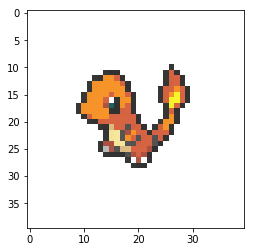

NameError: name 'x_test' is not defined

In [3]:

img=mpimg.imread('figure/004MS.png')
imgplot = plt.imshow(img[:,:,0:3])
plt.show()

img=mpimg.imread('figure/002MS.png')
imgplot = plt.imshow(x_test[0][:,:,0:4])
plt.show()

In [5]:
%%time
import os
for dirPath, dirNames, fileNames in os.walk("figure"):
    pass
data=[]
for name in fileNames:
    path='figure/'+name
    img=mpimg.imread(path)
    data.append(img[4:36,4:36,0:4])
data=np.array(data)

x_train=data[:-3]
x_test=data[-3:]

x_train=x_train.reshape(len(x_train),32,32,4)
x_test=x_test.reshape(len(x_test),32,32,4)

print('x_train shape=',x_train.shape)
print('x_test shape=',x_test.shape)

x_train shape= (789, 32, 32, 4)
x_test shape= (3, 32, 32, 4)
CPU times: user 185 ms, sys: 22.7 ms, total: 207 ms
Wall time: 212 ms


In [4]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img=Input(shape=(32,32,4))

x=Conv2D(16,(3,3),activation='relu',padding='same')(input_img)
print(x.shape)
x=MaxPooling2D((2,2),padding='same')(x)
print(x.shape)
x=Conv2D(8,(3,3),activation='relu',padding='same')(x)
print(x.shape)
x=MaxPooling2D((2,2),padding='same')(x)
print(x.shape)
x=Conv2D(8,(3,3),activation='relu',padding='same')(x)
print(x.shape)
encoded=MaxPooling2D((2,2),padding='same')(x)
print(encoded.shape)

x=Conv2D(8,(3,3),activation='relu',padding='same')(encoded)
print(x.shape)
x=UpSampling2D((2,2))(x)
print(x.shape)
x=Conv2D(8,(3,3),activation='relu',padding='same')(x)
print(x.shape)
x=UpSampling2D((2,2))(x)
print(x.shape)
x=Conv2D(16,(3,3),activation='relu',padding='same')(x)
print(x.shape)
x=UpSampling2D((2,2))(x)
print(x.shape)
decoded=Conv2D(4,(3,3),activation='sigmoid',padding='same')(x)
print(decoded.shape)


(?, 32, 32, 16)
(?, 16, 16, 16)
(?, 16, 16, 8)
(?, 8, 8, 8)
(?, 8, 8, 8)
(?, 4, 4, 8)
(?, 4, 4, 8)
(?, 8, 8, 8)
(?, 8, 8, 8)
(?, 16, 16, 8)
(?, 16, 16, 16)
(?, 32, 32, 16)
(?, 32, 32, 4)


In [5]:
#input_img=Input(shape=(32,32,4))
autoencoder=Model(input_img,decoded)
#keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
autoencoder.compile(optimizer='Adamax',loss='binary_crossentropy')
autoencoder.fit(x_train,x_train,epochs=100,batch_size=64,shuffle=True,validation_data=(x_test,x_test))

Train on 789 samples, validate on 3 samples
Epoch 1/100
789/789 [==============================] - 2s 2ms/step - loss: 0.6315 - val_loss: 0.9440
Epoch 2/100
789/789 [==============================] - 1s 2ms/step - loss: 0.5167 - val_loss: 0.8867
Epoch 3/100
789/789 [==============================] - 1s 2ms/step - loss: 0.4249 - val_loss: 0.7913
Epoch 4/100
789/789 [==============================] - 1s 2ms/step - loss: 0.3674 - val_loss: 0.7346
Epoch 5/100
789/789 [==============================] - 1s 2ms/step - loss: 0.3416 - val_loss: 0.7177
Epoch 6/100
789/789 [==============================] - 1s 2ms/step - loss: 0.3278 - val_loss: 0.7071
Epoch 7/100
789/789 [==============================] - 1s 2ms/step - loss: 0.3197 - val_loss: 0.7023
Epoch 8/100
789/789 [==============================] - 1s 2ms/step - loss: 0.3129 - val_loss: 0.6998
Epoch 9/100
789/789 [==============================] - 1s 2ms/step - loss: 0.3061 - val_loss: 0.6982
Epoch 10/100
789/789 [=========================

Epoch 81/100
789/789 [==============================] - 1s 2ms/step - loss: 0.2316 - val_loss: 0.3891
Epoch 82/100
789/789 [==============================] - 1s 2ms/step - loss: 0.2310 - val_loss: 0.3795
Epoch 83/100
789/789 [==============================] - 1s 2ms/step - loss: 0.2303 - val_loss: 0.3899
Epoch 84/100
789/789 [==============================] - 1s 2ms/step - loss: 0.2300 - val_loss: 0.3845
Epoch 85/100
789/789 [==============================] - 1s 2ms/step - loss: 0.2299 - val_loss: 0.3765
Epoch 86/100
789/789 [==============================] - 1s 2ms/step - loss: 0.2296 - val_loss: 0.3880
Epoch 87/100
789/789 [==============================] - 1s 2ms/step - loss: 0.2292 - val_loss: 0.3816
Epoch 88/100
789/789 [==============================] - 1s 2ms/step - loss: 0.2289 - val_loss: 0.3782
Epoch 89/100
789/789 [==============================] - 1s 2ms/step - loss: 0.2286 - val_loss: 0.3820
Epoch 90/100
789/789 [==============================] - 1s 2ms/step - loss: 0.2284

In [13]:
input_img=Input(shape=(32,32,4))

encoder_layer1=autoencoder.layers[0](input_img)
encoder_layer2=autoencoder.layers[1](encoder_layer1)
encoder_layer3=autoencoder.layers[2](encoder_layer2)
encoder_layer4=autoencoder.layers[3](encoder_layer3)
encoder_layer5=autoencoder.layers[4](encoder_layer4)
encoder_layer6=autoencoder.layers[5](encoder_layer5)
encoder_layer7=autoencoder.layers[6](encoder_layer6)
encoder=Model(input_img,encoder_layer7)


encoded_input=Input(shape=(4, 4, 8))
decoder_layer=encoded_input
for i in range(7):
    temp=autoencoder.layers[i-7]
    decoder_layer=temp(decoder_layer)

decoder=Model(encoded_input,decoder_layer)

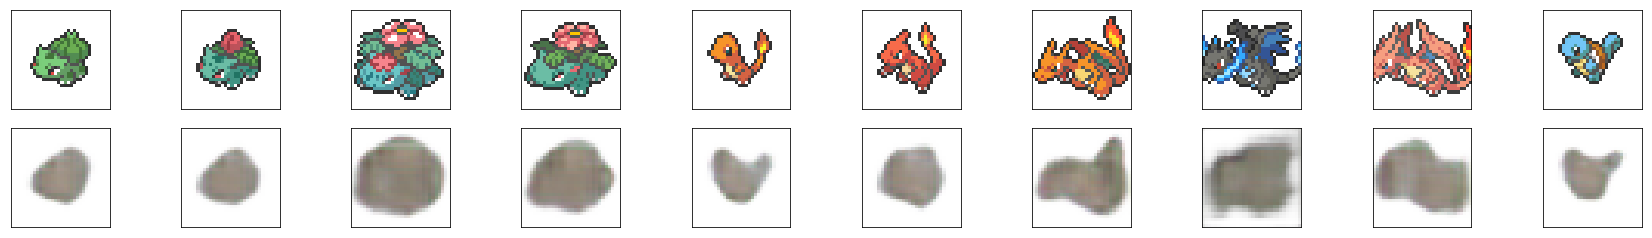

In [14]:
encoded_imgs = encoder.predict(x_train)
decoded_imgs = decoder.predict(encoded_imgs)
n = 10  # how many digits we will display
plt.figure(figsize=(30, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    imgplot = plt.imshow(x_train[i])
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    imgplot = plt.imshow(decoded_imgs[i])
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

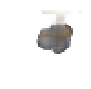

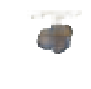

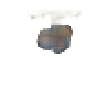

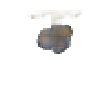

In [6]:

for i in range(4):
    test=encoded_imgs[0]
    test=test.reshape((1,5,5,8))
    test[0,0,:,:]*=0.3
    test_imgs = decoder.predict(test)
    plt.figure(figsize=(1, 1))
    plt.axis('off')

    
    imgplot = plt.imshow(test_imgs[0])


    plt.show()

(789, 32, 32, 4)


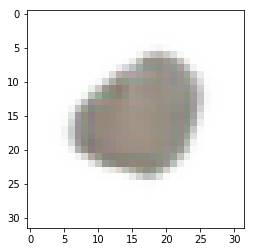

(3, 32, 32, 4)


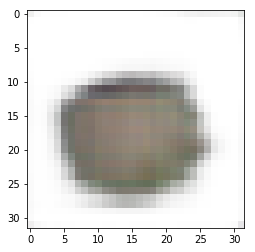

In [15]:
encoded_imgs = encoder.predict(x_train)
decoded_imgs = decoder.predict(encoded_imgs)

print(decoded_imgs.shape)
imgplot = plt.imshow(decoded_imgs[0])
plt.show()

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

print(decoded_imgs.shape)
imgplot = plt.imshow(decoded_imgs[0])
plt.show()